# Develop_model
## Load basic pkgs

In [1]:
from ppp_prediction.model_v2.benchmark import benchmark 
import pandas as pd

from pathlib import Path
from config import *
from ppp_prediction.plot.utils import save_fig
import matplotlib.pyplot as plt

# setting global font as calibri

TableDir = PaperDir / "Table"
FigureDir = PaperDir / "Figure"
RawDataDir = PaperDir / "RawData"
plt.rcParams["font.family"] = "Calibri"
default_dpi = 400
%config InlineBackend.figure_format = "svg"
%config InlineBackend.print_figure_kwargs = {"dpi" : 300}


[0.0, 0.5, 1.0]
[0.0, 50.0, 100.0]
[0.0, 20.0, 40.0, 60.0, 80.0]


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/dask/array/chunk_types.py:110: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------



## load basic data dir 



In [2]:
# omics dir 
omics_dir = Path('omics')

# secondary preventive dir 
data_dir = Path('data')

Prepare for omics data 

In [3]:
from ppp_prediction.utils import load_data
omics_dir_dict = {
    'RF':omics_dir/"RF.feather"
}
omics_data_dict = {
    k:load_data(v) for k,v in omics_dir_dict.items()
}
RF = omics_data_dict['RF']
RF

,eid,age,sex,smoking_status,education_years,daily_healthy_food,fh_diabetes,body_mass_index_bmi,waist_hip_ratio,waist_circumference,...,haematocrit_percentage,mean_corpuscular_haemoglobin,mean_corpuscular_volume,mean_corpuscular_haemoglobin_concentration,antihypertensives,PhysicalActivity,HealthyDiet,Alcohol consumption,Sedentary_behaviour,Sleep_duration
0,1000017,56.0,1,0,13.0,1,0,30.2528,1.038835,107.0,...,42.410000,29.710000,90.150000,32.960000,0,0,1,1,1,1
1,1000025,62.0,1,0,19.0,0,0,36.7704,0.982143,110.0,...,41.500000,33.330000,95.670000,34.840000,0,0,0,1,1,1
2,1000038,60.0,1,0,19.0,1,0,34.8228,0.894737,102.0,...,45.500000,32.800000,93.100000,35.200000,0,1,1,0,1,1
3,1000042,60.0,1,0,7.0,1,0,26.9949,0.960784,98.0,...,43.900000,28.900000,86.200000,33.600000,0,1,1,1,1,1
4,1000056,65.0,0,0,19.0,1,0,27.0993,1.202247,107.0,...,36.380000,32.470000,93.090000,34.880000,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502239,6024086,66.0,0,0,7.0,1,0,37.1058,0.825000,99.0,...,41.085232,31.450935,91.120117,34.512803,0,0,1,0,1,0
502240,6024098,68.0,1,0,19.0,1,0,27.1643,0.923810,97.0,...,42.140000,32.420000,95.780000,33.850000,0,0,1,1,1,1
502241,6024103,61.0,1,1,7.0,0,0,31.8282,1.062500,119.0,...,44.200000,31.600000,91.400000,34.600000,0,0,0,1,1,1
502242,6024110,66.0,1,0,19.0,1,0,23.3649,0.860000,86.0,...,41.760000,31.470000,89.700000,35.080000,0,1,1,0,1,1


In [4]:
RF.columns.tolist()

['eid',
 'age',
 'sex',
 'smoking_status',
 'education_years',
 'daily_healthy_food',
 'fh_diabetes',
 'body_mass_index_bmi',
 'waist_hip_ratio',
 'waist_circumference',
 'weight',
 'standing_height',
 'systolic_blood_pressure_medical_adjust',
 'cholesterol',
 'ldl_direct_medical_adjust',
 'hdl_cholesterol',
 'triglycerides_medical_adjust',
 'glucose',
 'glycated_haemoglobin_hba1c',
 'creatinine',
 'cystatin_c',
 'urea',
 'urate',
 'aspartate_aminotransferase',
 'alanine_aminotransferase',
 'alkaline_phosphatase',
 'albumin',
 'creactive_protein',
 'red_blood_cell_erythrocyte_count',
 'white_blood_cell_leukocyte_count',
 'platelet_count',
 'haemoglobin_concentration',
 'haematocrit_percentage',
 'mean_corpuscular_haemoglobin',
 'mean_corpuscular_volume',
 'mean_corpuscular_haemoglobin_concentration',
 'antihypertensives',
 'PhysicalActivity',
 'HealthyDiet',
 'Alcohol consumption',
 'Sedentary_behaviour',
 'Sleep_duration']

Prapare for features used in omics

In [5]:
feature_omics_dict = None  # None or a dictionary

# Example of feature_omics_dict
# feature_omics_dict = {
#     RF:['Age',"Sex"]
# }

Get the prevantative

In [6]:
secondary_prevantative_combinations = [(i.parent.parent.stem, i.parent.stem) for i in list(data_dir.rglob("*disease.feather"))]
secondary_prevantative_combinations


[('hypertension', 'type_2_diabetes'),
 ('hypertension', 'hypertrophic_cardiomyopathy'),
 ('hypertension', 'coronary_artery_disease'),
 ('hypertension', 'dilated_cardiomyopathy'),
 ('hypertension', 'Ischemic_cardiomyopathy'),
 ('hypertension', 'obesity'),
 ('hypertension', 'Heart_Failure'),
 ('type_2_diabetes', 'hypertension'),
 ('type_2_diabetes', 'hypertrophic_cardiomyopathy'),
 ('type_2_diabetes', 'coronary_artery_disease'),
 ('type_2_diabetes', 'dilated_cardiomyopathy'),
 ('type_2_diabetes', 'Ischemic_cardiomyopathy'),
 ('type_2_diabetes', 'obesity'),
 ('type_2_diabetes', 'Heart_Failure'),
 ('hypertrophic_cardiomyopathy', 'hypertension'),
 ('hypertrophic_cardiomyopathy', 'type_2_diabetes'),
 ('hypertrophic_cardiomyopathy', 'coronary_artery_disease'),
 ('hypertrophic_cardiomyopathy', 'dilated_cardiomyopathy'),
 ('hypertrophic_cardiomyopathy', 'Ischemic_cardiomyopathy'),
 ('hypertrophic_cardiomyopathy', 'obesity'),
 ('hypertrophic_cardiomyopathy', 'Heart_Failure'),
 ('coronary_artery_

## Benchmark

In [6]:
secondary_prevantative_output_dir = outputDir / "01-secondary_prevantative"
secondary_prevantative_output_dir.mkdir(exist_ok=True, parents=True)

In [7]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split


def train_test_split_and_save(
        data: pd.DataFrame,
        save_dir: str,
        random_state: int = 42,
        test_size: float = 0.3,
) -> tuple[pd.DataFrame, pd.DataFrame]:
    """Split data into training and testing sets, and save them as feather files.

    Args:
        data: Input DataFrame to be split.
        save_dir: Directory path where the split data will be saved.
        random_state: Seed for random number generation to ensure reproducibility.
        test_size: Proportion of the dataset to include in the test split (default: 0.3).

    Returns:
        A tuple containing the training and testing DataFrames.

    Raises:
        FileExistsError: If the save directory cannot be created.
    """
    # Convert save_dir to Path object if it's a string
    save_dir = Path(save_dir) if isinstance(save_dir, str) else save_dir
    # Create the directory if it doesn't exist
    save_dir.mkdir(exist_ok=True, parents=True)

    # Define paths for training and testing data
    train_df_path = save_dir / 'train.feather'
    test_df_path = save_dir / 'test.feather'

    # Check if the files already exist
    if train_df_path.exists() and test_df_path.exists():
        # Load existing files
        train_df = pd.read_feather(train_df_path)
        test_df = pd.read_feather(test_df_path)
    else:
        # Split the data into training and testing sets
        train_df, test_df = train_test_split(
            data,
            random_state=random_state,
            test_size=test_size,
        )
        # Reset index to avoid carrying over old indices
        train_df.reset_index(drop=True, inplace=True)
        test_df.reset_index(drop=True, inplace=True)

        # Save the split data to feather files
        train_df.to_feather(train_df_path)
        test_df.to_feather(test_df_path)

    return train_df, test_df


In [8]:
import logging
from pathlib import Path
import sys

def setup_logging(
    log_file: str = "jupyter.log",
    log_level: str = "INFO",
    log_format: str = "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    log_to_console: bool = True,
    log_to_file: bool = True,
) -> logging.Logger:
    """
    配置并返回一个适用于 Jupyter Notebook 的日志记录器。

    Args:
        log_file (str): 日志文件的路径，默认为当前目录下的 "jupyter.log"。
        log_level (str): 日志级别，可选值为 "DEBUG", "INFO", "WARNING", "ERROR", "CRITICAL"。
        log_format (str): 日志格式字符串。
        log_to_console (bool): 是否将日志输出到控制台。
        log_to_file (bool): 是否将日志保存到文件。

    Returns:
        logging.Logger: 配置好的日志记录器。
    """
    # 创建日志记录器
    logger = logging.getLogger(__name__)
    logger.setLevel(log_level.upper())

    # 清除已有的处理器，避免重复日志
    logger.handlers.clear()

    # 配置日志格式
    formatter = logging.Formatter(log_format)

    # 输出到控制台
    if log_to_console:
        console_handler = logging.StreamHandler(sys.stdout)
        console_handler.setFormatter(formatter)
        logger.addHandler(console_handler)

    # 输出到文件
    if log_to_file:
        # 确保日志目录存在
        log_path = Path(log_file)
        log_path.parent.mkdir(parents=True, exist_ok=True)

        file_handler = logging.FileHandler(log_file, mode="a", encoding="utf-8")
        file_handler.setFormatter(formatter)
        logger.addHandler(file_handler)

    return logger


# 示例用法
if __name__ == "__main__":
    # 配置日志记录器
    logger = setup_logging(
        log_file="jupyter.log",
        log_level="INFO",
        log_to_console=True,
        log_to_file=True,
    )

    # 使用日志记录器
    logger.debug("这是一条 DEBUG 级别的日志")
    logger.info("这是一条 INFO 级别的日志")
    logger.warning("这是一条 WARNING 级别的日志")
    logger.error("这是一条 ERROR 级别的日志")
    logger.critical("这是一条 CRITICAL 级别的日志")


2025-08-22 11:45:54,112 - __main__ - INFO - 这是一条 INFO 级别的日志
2025-08-22 11:45:54,114 - __main__ - WARNING - 这是一条 WARNING 级别的日志
2025-08-22 11:45:54,114 - __main__ - ERROR - 这是一条 ERROR 级别的日志
2025-08-22 11:45:54,115 - __main__ - CRITICAL - 这是一条 CRITICAL 级别的日志


In [9]:
# from torch_frame.utils import infer_df_stype
# import pickle
# import json 
# from ppp_prediction.model_v2.models import *
# from torch_frame import stype
# from pathlib import Path
# import pandas as pd 
# def benchmark(
#         train, 
#         xvar,
#         label,
#         test,
#         benchmark_saveDir = "benchmark_test1",
#         methods=[],
#         device='cuda',
#         seed = 42,
# ):
#     # set output f older file dirs 

#     ## train_data save 
#     benchmark_saveDir = Path(benchmark_saveDir)
#     used_train_df_save_dir = benchmark_saveDir / "raw_train.feather"
#     used_train_balance_df_save_dir = benchmark_saveDir / "raw_train_balance.feather"
#     model_save_dir = benchmark_saveDir/'Model'
#     metrics_df_save_dir = benchmark_saveDir/'metrics.csv'
#     meta_save_dir  = benchmark_saveDir/'metadata.pkl'

#     train_df = train.reset_index(drop=True).copy()
    
#     col_to_stype = infer_df_stype(train_df[xvar + [label]])  # for dl based methods
#     train_meta_info = {}   # save train case and train control



#     # load model or train 
#     if used_train_df_save_dir.exists():
#         used_train_df_local = pd.read_feather(used_train_df_save_dir)
#         # check local data as same as passed params
#         if not train_df.equals(used_train_df_local):
#             raise ValueError(f"{used_train_df_save_dir} is not consistant ")
#         else:
#             del used_train_df_local
        
#         # check json info 
#         # local_json_info = json.load(str(meta_json_df_dir))

#         local_json_info = pd.read_pickle(meta_save_dir)
#         if local_json_info["xvar"] != xvar:
#             raise ValueError(f"xvar is not consistant, passed is {xvar} and local is {local_json_info['xvar']}")
#         if local_json_info["label"] != label:
#             raise ValueError(f"label is not consistant, passed is {label} and local is {local_json_info['label']}")

#         disease_train_sample_eid = pd.read_feather(used_train_balance_df_save_dir)
#     else:
#         benchmark_saveDir.mkdir(parents=True, exist_ok=True)
#         ## 1) split train balance for special methods
#         disease_train_case = train_df.query(f"{label} == 1")
#         disease_train_case_number = min(disease_train_case.shape[0], 5000)

#         disease_train_case = disease_train_case.sample(
#             n = disease_train_case_number , random_state=seed, replace=False
#         )
        
#         disease_train_control = train_df.query(f"{label} == 0").sample(
#             n=min(disease_train_case.shape[0], train_df.query(f"{label} == 0").shape[0]), random_state=seed
#         )
#         disease_train_sample_eid = pd.concat(
#             [disease_train_case, disease_train_control]
#         )[['eid']]

#         ## save data 
#         train_df.reset_index(drop=True).to_feather(used_train_df_save_dir)
#         disease_train_sample_eid.reset_index(drop=True).to_feather(used_train_balance_df_save_dir)
#         ## save meta info 
#         meta_info = {
#             "xvar":xvar,
#             'label': label,
#         }
#         ### save into json 
#         pickle.dump(meta_info, open(str(meta_save_dir), "wb"))
  

#     # prepare for training
#     disease_train_sample = pd.merge(disease_train_sample_eid, train_df, on="eid", how="inner")
#     ## null data to store output 
#     merged_df = pd.concat([
#         train.assign(Type='Train'),
#         test.assign(Type='Test'),
#     ]).reset_index(drop=True)  # Mark

#     model_save_dir.mkdir(parents=True, exist_ok=True)
#     ## iter for training
#     for modelName in methods:  
#         tgt_method_save_dir = model_save_dir / f"{modelName}.pkl"
#         tgt_method_score_dir = model_save_dir / f"{modelName}.feather"

#         # 1)  decide data used 
#         if modelName not in ['AutoTabPFN', 'rfpfn', 'TunedTabPFN', 'TabPFN']:  # only these for model use balance data
#             used_train_df = train_df
#         else:
#             used_train_df = disease_train_sample
#         # used_train_df = train_df  if modelName in  ["Lasso", "TabPFNSubsample",  "XGboost", "TabNet", "MLP", "ResNet", "TabTransformer"] else disease_train_sample  
#         col_to_stype = infer_df_stype(used_train_df[xvar + [label]]) 

#         X_train = used_train_df[xvar]
#         y_train = used_train_df[label]

#         train_meta_info[modelName] = {
#             "train_case": y_train.sum(),
#             "train_control": y_train.shape[0]
#             - y_train.sum(),
#         }
#         print(f"{modelName} start with {train_meta_info[modelName]}")

#         # 2) check model 
#         if not tgt_method_save_dir.exists(): # train model 
#         # decide used_train_df
            
#             if modelName in ["Lasso", 
#                             "Logistic",
#                                 "ElasticNet"]:
#                 lasso_engine = "cuml" if device == "cuda" else "sklearn"

#                 # special for Lasso, using the full training set with same features
#                 # LassoSample, using the sampling data with same features
                
#                 if used_train_df.shape[0] < 5000:
#                     lasso_engine = "sklearn"
#                 print(f"lasso_full start with engine {lasso_engine}")
#                 (model, *_) = fit_best_model(
#                     train_df=used_train_df,
#                     X_var=xvar,
#                     y_var=label,
#                     method_list=modelName,
#                     cv=10,
#                     engine=lasso_engine,
#                 )
#             elif modelName == "XGboost":
#                 model, *_ = fit_xgboost(
#                     train=used_train_df,
#                     xvar=xvar,
#                     label=label,
#                     tuning=True,
#                     tune_config={"max_iter": 100},
#                 )
#             elif modelName == 'lightGBM':
                
#                 model, *_ = fit_lightgbm(
#                     train=used_train_df,
#                     xvar=xvar,
#                     label=label,
#                     tuning=True,
#                     tune_config={"max_iter": 100},
#                 )
#             elif modelName == 'catboost':
                                            
#                 model, *_ = fit_catboost(
#                     train=used_train_df,
#                     xvar=xvar,
#                     label=label,
#                     tuning=True,
#                     tune_config={"max_iter": 100},
#                 )
#             elif modelName == "TabNet":
#                 model, *_ = fit_tabular_dl(
#                     train=used_train_df,
#                     xvar=xvar,
#                     label=label,
#                     model_type = modelName,
#                     epochs=10,
#                     num_trials=50,
#                     device="cuda",
#                     col_to_stype=col_to_stype
#                 )
#             elif modelName == "MLP":
#                 model, *_ = fit_tabular_dl(train=used_train_df, xvar=xvar,label=label,model_type = modelName,epochs=10,num_trials=50,device="cuda",col_to_stype=col_to_stype)
#             elif modelName == "ResNet":
#                 model, *_ = fit_tabular_dl(
#                     train=used_train_df,
#                     xvar=xvar,
#                     label=label,
#                     model_type = modelName,
#                     epochs=10,
#                     num_trials=50,
#                     device="cuda",
#                     col_to_stype=col_to_stype
#                 )
#             elif modelName == "TabTransformer":
#                 model, *_ = fit_tabular_dl(
#                     train=used_train_df,
#                     xvar=xvar,
#                     label=label,
#                     model_type = modelName,
#                     epochs=10,
#                     num_trials=50,
#                     device="cuda",
#                     col_to_stype=col_to_stype
#                 )
#             elif modelName == 'Trompt':
#                 model, *_ = fit_tabular_dl(
#                     train=used_train_df,
#                     xvar=xvar,
#                     label=label,
#                     model_type = modelName,
#                     epochs=10,
#                     num_trials=50,
#                     device="cuda",
#                     col_to_stype=col_to_stype
#                 )
#             elif modelName == "ExcelFormer":
#                 model, *_ = fit_tabular_dl(
#                     train=used_train_df,
#                     xvar=xvar,
#                     label=label,
#                     model_type = modelName,
#                     epochs=10,
#                     num_trials=50,
#                     device="cuda",
#                     col_to_stype=col_to_stype
#                 )
#             elif modelName == 'FTTransformer':
#                 model, *_ = fit_tabular_dl(
#                     train=used_train_df,
#                     xvar=xvar,
#                     label=label,
#                     model_type = modelName,
#                     epochs=10,
#                     num_trials=50,
#                     device="cuda",
#                     col_to_stype=col_to_stype
#                 )
#             elif modelName == "TabPFN":
#                 from tabpfn.classifier import TabPFNClassifier
#                 # model = TabPFNClassifier( device="cuda:0" if device == "cuda" else "cpu",ignore_pretraining_limits=True, fit_mode = "fit_preprocessors", n_estimators=1,inference_config={ "SUBSAMPLE_SAMPLES": 2000})
#                 model = TabPFNClassifier(
#                     device="cuda:0",
#                     ignore_pretraining_limits=True,
#                     fit_mode="fit_preprocessors",
#                     n_estimators=1,
#                 )
#                 model.fit(X_train, y_train)

#             elif modelName == "AutoTabPFN":
#                 from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import (
#                     AutoTabPFNClassifier,
#                     )

#                 model = AutoTabPFNClassifier(
#                     max_time=60*3, device="cuda" if device == "cuda" else "cpu", ignore_pretraining_limits=False
#                 )  # 120 seconds tuning time
#                 model.fit(X_train, y_train)
#             elif modelName == "TunedTabPFN": # Tuned TabPFN
#                 from tabpfn_extensions.hpo import (
#                     TunedTabPFNClassifier,
#                     TunedTabPFNRegressor,
#                 )
#                 model = TunedTabPFNClassifier(device="cuda:0" if device == "cuda" else "cpu",)
#                 model.fit(X_train, y_train)
#             elif modelName == "rfpfn":
#                 from tabpfn_extensions.rf_pfn import (
#                     RandomForestTabPFNClassifier,
#                     RandomForestTabPFNRegressor,
#                 )
#                 from tabpfn.classifier import TabPFNClassifier

#                 clf_base = TabPFNClassifier(device="cuda:0" if device == "cuda" else "cpu",)
#                 model = RandomForestTabPFNClassifier(tabpfn=clf_base,n_estimators=100,max_depth=5)
#                 model.fit(X_train, y_train)


#             elif modelName == "rf_pfn_subsample":  # get predict should be batched, otherwise memeory errors with large data 
#                 from tabpfn_extensions.rf_pfn import (
#                     RandomForestTabPFNClassifier,
#                     RandomForestTabPFNRegressor,
#                 )
#                 from tabpfn.classifier import TabPFNClassifier
#                 clf_base = TabPFNClassifier(device="cuda:0" if device == "cuda" else "cpu", ignore_pretraining_limits=True, inference_config={ "SUBSAMPLE_SAMPLES": 5000,} )
#                 model = RandomForestTabPFNClassifier( tabpfn=clf_base,n_estimators=100,max_predict_time = 60,max_depth=5,class_weight = "balanced", adaptive_tree_max_train_samples=3000, max_samples=3000)
#                 model.fit(X_train, y_train)
#             elif modelName == "TabPFNSubsample":
#                 from tabpfn.classifier import TabPFNClassifier
#                 model = TabPFNClassifier(
#                     device="cuda:0" if device == "cuda" else "cpu",
#                 ignore_pretraining_limits=True,  # (bool) Allows the use of datasets larger than pretraining limits.
#                 n_estimators=32,  # (int) Number of estimators for ensembling; improves accuracy with higher values.
#                 inference_config={
#                     "SUBSAMPLE_SAMPLES": 10000,  # (int) Maximum number of samples per inference step to manage memory usage.
#                 },
#                 )
#                 model.fit(X_train, y_train)

#             else:
#                 raise ValueError(f"model {modelName} not implemented")  
#             # save model 

#             pickle.dump(model, open(tgt_method_save_dir, "wb"))
    

#         else:
#             print(f"{modelName} Score already saved and loaded local model")
#             model = pickle.load(open(tgt_method_save_dir,"rb"))
#         # 3) check score 
#         # print()
#         # try:
#         if tgt_method_score_dir.exists():
#             print(f"{modelName} Score already saved and loaded local score")
#             model_topk_score_df = pd.read_feather(tgt_method_score_dir)
#             merged_df = merged_df.merge(model_topk_score_df, on="eid", how="left")
#         else:
#             # if modelName == "rf_pfn_subsample":
#             # import pdb; pdb.set_trace() 
#             # merged_df[f"{modelName}"] = get_predict_v2_from_df(model, merged_df, xvar, batch_size = 10000 if  modelName == "rf_pfn_subsample" else None )
#             print(merged_df)
#             merged_df[f"{modelName}"] = get_predict_v2_from_df(model, merged_df, xvar)

#             model_topk_score_df = merged_df[["eid", modelName]].copy().reset_index(drop=True)
#             model_topk_score_df.to_feather(tgt_method_score_dir)
#             print(f"{modelName} saved")
#         del model # remove model to save memory

#         # add modelName into scores
#         # scores.append(modelName)

#         torch.cuda.empty_cache()
#     ## 4) ??

#     if metrics_df_save_dir.exists():
#         metrics_df = pd.read_csv(metrics_df_save_dir)
#         to_cal_scores = set(methods).difference(metrics_df["method"].tolist())
#     else:
#         metrics_df = pd.DataFrame()
#         to_cal_scores = methods
#     if len(to_cal_scores) == 0:
#         pass
#     else:
#         for modelName in to_cal_scores:
#             to_cal_df = merged_df.query(f"Type =='Test'")[[label, modelName]].dropna().reset_index(drop=True)

#             res = cal_binary_metrics(
#                 to_cal_df[label], to_cal_df[modelName], n_resamples=100, ci=True # 
#             )
#             # res = run_cox(to_cal_df, var=key, E=E, T=T, ci=True, n_resamples=100)
#             res["method"] = modelName
#             res['Test_N_case'] = to_cal_df[label].sum()
#             res['Test_N_control'] = to_cal_df[label].shape[0] - to_cal_df[label].sum()
#             res.update(train_meta_info[modelName])
#             # metrics_list.append(res)
#             metrics_df = pd.concat([metrics_df, pd.Series(res).to_frame().T])

        
#     return merged_df,metrics_df

## For training model with omics data

In [88]:
# from ppp_prediction.model_v2.benchmark import benchmark 


methods = ['Lasso']
random_state = 42
label_col = 'incident'

data_list = []
metric_list = [] 
# iter over all combinations of baseline and secondary diseases
for baseline_disease, secondary_disease in secondary_prevantative_combinations:
        # iter over omics
        for omics, omics_data in omics_data_dict.items():
                # build save dir
                c_save_dir = secondary_prevantative_output_dir / f"{baseline_disease}/{secondary_disease}"
                c_save_dir.mkdir(exist_ok=True, parents=True)
                
                # set up logger 

                logger = setup_logging(
                        log_file=c_save_dir / f"{omics}_log.txt",
                        log_level="INFO",
                        log_to_console=True,
                        log_to_file=True,
                )

                # load data 
                logger.info(f"loading label data from {baseline_disease} to {secondary_disease}")

                label_df_dir = data_dir / f"{baseline_disease}/{secondary_disease}/disease.feather"
                label_df = load_data(label_df_dir)
                label_df['eid'] = label_df['eid'].astype(str) # convert to string
                logger.info(f"Finished loading label data from {baseline_disease} to {secondary_disease} with {len(label_df)} samples")
                # merge data 
                logger.info(f"merging data from {omics} to {baseline_disease} to {secondary_disease}")
                all_data = label_df.merge(omics_data, on='eid', how='inner')
                logger.info(f"Finished merging data from {omics} to {baseline_disease} to {secondary_disease} with {len(all_data)} samples")

                # process for data split
                logger.info(f"splitting data from {omics} to {baseline_disease} to {secondary_disease}")
                train_df, test_df = train_test_split_and_save(
                        all_data,
                        c_save_dir,
                        random_state=random_state,
                        test_size=0.3
                )
                # check case and control number 

                train_case_number = train_df[train_df[label_col] == 1].shape[0]
                test_case_number = test_df[test_df[label_col] == 1].shape[0]
                logger.info(f"train case number: {train_case_number}")
                logger.info(f"test case number: {test_case_number}")
                if train_case_number < 10 or test_case_number < 10:
                        logger.error(f"case number is too small, skip")
                        continue 


                # (opt) : get feature 
                if feature_omics_dict is not None:
                        features = feature_omics_dict.get(omics, omics_data.columns[1:].tolist())
                else:
                        features = omics_data.columns[1:].tolist()
                logger.info(f"Using features: {', '.join(features)}")
                
                ## drop na of features and labels 
                with_na_train_df_shape = train_df.shape
                with_na_test_df_shape = test_df.shape
                train_df = train_df.dropna(subset=features + [label_col])
                test_df = test_df.dropna(subset=features + [label_col])
                logger.info(f"drop na of features and labels, train data shape from {with_na_train_df_shape} to {train_df.shape}")
                logger.info(f"drop na of features and labels, test data shape from {with_na_test_df_shape} to {test_df.shape}")

                # train model
                # main train 

                result_df, metrics_df = benchmark(
                        train=train_df,
                        test=test_df,
                        xvar = features,
                        methods=methods,
                        label=label_col,
                        device='cuda',
                        seed = random_state,
                        benchmark_saveDir = c_save_dir/ 'benchmark'
                )


                result_df = result_df[['eid','Type', 'survTime',label_col, *methods]].rename(columns ={
                        method:f"{baseline_disease}:{secondary_disease}:{method}" for method in methods
                })
                data_list.append(result_df)
                result_df.to_feather(c_save_dir / f"{omics}.feather")

                metrics_df.insert(0, "Baseline", baseline_disease)
                metrics_df.insert(1, "Secondary", secondary_disease)
                metrics_df.insert(2, "Omics", omics)
                metrics_df.insert(3, "Method", methods)
                metrics_df.insert(4, "Random State", random_state)
                metric_list.append(metrics_df)




2025-08-25 13:26:55,566 - __main__ - INFO - loading label data from type_2_diabetes to hypertrophic_cardiomyopathy
2025-08-25 13:26:55,580 - __main__ - INFO - Finished loading label data from type_2_diabetes to hypertrophic_cardiomyopathy with 12124 samples
2025-08-25 13:26:55,581 - __main__ - INFO - merging data from RF to type_2_diabetes to hypertrophic_cardiomyopathy
2025-08-25 13:26:56,128 - __main__ - INFO - Finished merging data from RF to type_2_diabetes to hypertrophic_cardiomyopathy with 12124 samples
2025-08-25 13:26:56,129 - __main__ - INFO - splitting data from RF to type_2_diabetes to hypertrophic_cardiomyopathy
2025-08-25 13:26:56,149 - __main__ - INFO - train case number: 7
2025-08-25 13:26:56,151 - __main__ - INFO - test case number: 4
2025-08-25 13:26:56,151 - __main__ - ERROR - case number is too small, skip
2025-08-25 13:26:56,153 - __main__ - INFO - loading label data from type_2_diabetes to coronary_artery_disease
2025-08-25 13:26:56,162 - __main__ - INFO - Finishe

In [89]:
data_list[0]

,eid,Type,survTime,incident,type_2_diabetes:coronary_artery_disease:Lasso
0,1557311,Train,14.608219,0,0.032796
1,2870540,Train,9.432877,0,0.211081
2,3086406,Train,14.380822,0,0.111576
3,1709822,Train,14.145205,0,0.126103
4,5719524,Train,14.868493,0,0.041211
...,...,...,...,...,...
9915,1310206,Test,14.536986,0,0.218153
9916,3818660,Test,6.764384,0,0.080801
9917,5928630,Test,13.186301,0,0.040462
9918,3029653,Test,15.605479,0,0.202491


In [104]:
from ppp_prediction.cox import run_cox_v2 

label_col = 'incident'
cox_res_list = []
for each in data_list:
        tgt_cols = each.columns[4:].tolist()
        for tgt_col in tgt_cols:
                to_cal_data =  each.query("Type == 'Test'")[[label_col, tgt_col, 'survTime']].dropna().reset_index(drop=True).copy()
                rename_dict = {tgt_col: tgt_col.replace(":", "_")}
                baseline_disease, secondary_disease, method = tgt_col.split(":")
                to_cal_data = to_cal_data.rename(columns=rename_dict)
                if to_cal_data.shape[0] == 0:
                    continue
                if to_cal_data[rename_dict[tgt_col]].sum() <=10:
                    continue    
                c_index_res = run_cox_v2(
                        df =to_cal_data,
                        var = rename_dict[tgt_col],
                        E = 'incident',
                        T = 'survTime',
                        norm_x='zscore',
                )
                c_index_res.insert(0, "Baseline", baseline_disease)
                c_index_res.insert(1, "Secondary", secondary_disease)
                c_index_res.insert(2, "Method", method)
                cox_res_list.append(c_index_res)





normalizing ['type_2_diabetes_coronary_artery_disease_Lasso'] by zscore
type_2_diabetes_coronary_artery_disease_Lasso

normalizing ['type_2_diabetes_dilated_cardiomyopathy_Lasso'] by zscore
type_2_diabetes_dilated_cardiomyopathy_Lasso

normalizing ['coronary_artery_disease_type_2_diabetes_Lasso'] by zscore
coronary_artery_disease_type_2_diabetes_Lasso

normalizing ['coronary_artery_disease_dilated_cardiomyopathy_Lasso'] by zscore
coronary_artery_disease_dilated_cardiomyopathy_Lasso

normalizing ['dilated_cardiomyopathy_type_2_diabetes_Lasso'] by zscore
dilated_cardiomyopathy_type_2_diabetes_Lasso


In [108]:
#  to_cal_data[tgt_col]
# each
pd.concat(cox_res_list)[['Baseline', "Secondary", 'HR (95% CI)',"n_case", 'n_control', "pvalue", "c_index", ]].sort_values(["Secondary", "Baseline"])

,Baseline,Secondary,HR (95% CI),n_case,n_control,pvalue,c_index
0,type_2_diabetes,coronary_artery_disease,1.75 (1.60-1.92),432,2540,8.884045e-34,0.655692
0,coronary_artery_disease,dilated_cardiomyopathy,1.79 (1.44-2.22),59,4873,1.302667e-07,0.683564
0,type_2_diabetes,dilated_cardiomyopathy,1.40 (0.95-2.05),22,3605,8.796325e-02,0.602147
0,coronary_artery_disease,type_2_diabetes,1.64 (1.60-1.69),804,3488,0.000000e+00,0.810177
0,dilated_cardiomyopathy,type_2_diabetes,1.99 (1.33-2.98),15,74,7.562126e-04,0.765748


In [66]:
features

['age',
 'sex',
 'smoking_status',
 'education_years',
 'daily_healthy_food',
 'fh_diabetes',
 'body_mass_index_bmi',
 'waist_hip_ratio',
 'waist_circumference',
 'weight',
 'standing_height',
 'systolic_blood_pressure_medical_adjust',
 'cholesterol',
 'ldl_direct_medical_adjust',
 'hdl_cholesterol',
 'triglycerides_medical_adjust',
 'glucose',
 'glycated_haemoglobin_hba1c',
 'creatinine',
 'cystatin_c',
 'urea',
 'urate',
 'aspartate_aminotransferase',
 'alanine_aminotransferase',
 'alkaline_phosphatase',
 'albumin',
 'creactive_protein',
 'red_blood_cell_erythrocyte_count',
 'white_blood_cell_leukocyte_count',
 'platelet_count',
 'haemoglobin_concentration',
 'haematocrit_percentage',
 'mean_corpuscular_haemoglobin',
 'mean_corpuscular_volume',
 'mean_corpuscular_haemoglobin_concentration',
 'antihypertensives',
 'PhysicalActivity',
 'HealthyDiet',
 'Alcohol consumption',
 'Sedentary_behaviour',
 'Sleep_duration']

## For test performance of PRS 

### load PRS 

In [ ]:
PRS = pd.read_feather("/home/xutingfeng/ukb/project/sex_diff/PRS/PGSCatalogV1-RawScore/merged_score.feather")

In [ ]:
# # extract from pgs catalog locally version
prs_map = {
    "PGS004862": "dilated_cardiomyopathy",
    # "PGS004911": "hypertrophic_cardiomyopathy",
    "PGS000014":"type_2_diabetes",
    "PGS003725": "coronary_artery_disease",
    "PGS003969":"Heart_Failure"
}

PRS[['IID', *list(prs_map.keys())]].rename(columns=prs_map).rename(columns={'IID': 'eid'}).to_feather("PRS/PRS.feather")

# PRS

### test performance

In [69]:
PRS = pd.read_feather("PRS/PRS.feather")
PRS['eid'] = PRS['eid'].astype(str)
PRS

,eid,dilated_cardiomyopathy,type_2_diabetes,coronary_artery_disease,hypertrophic_cardiomyopathy
0,1000017,0.130971,-0.126189,0.682727,-2.08530
1,1000025,0.091098,-0.123302,0.283694,-2.14785
2,1000038,0.022192,-0.139020,-0.187220,-1.88432
3,1000042,-0.154114,0.077972,-0.337370,-2.12034
4,1000056,0.004967,0.005242,0.406343,-1.98259
...,...,...,...,...,...
487195,6024086,0.117360,0.189894,0.465272,-2.21676
487196,6024098,-0.036169,0.002083,1.058290,-2.01865
487197,6024103,-0.021057,-0.113737,-0.079575,-1.76469
487198,6024110,0.104501,-0.088044,0.113340,-2.30961


In [117]:
cov_df = pd.read_feather("/home/xutingfeng/ukb/project/AAA_lifeStyle/data/covariates.feather")
cov_df

,eid,Age_at_recruitment,Sex(M),Genetic_sex,Ethnicity,HbA1C,LDL_cholesterol,HDL_cholesterol,Cholesterol,Triglycerides,...,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,genotype_array
0,1000017,56,M,M,White,35.2,4.589,1.179,7.018,3.553,...,3.56718,-1.975530,0.213937,-12.43420,-1.698380,-0.090687,-3.498190,4.762600,3.153210,1
1,1000025,62,M,M,White,56.7,2.48,1.259,4.433,2.678,...,2.77470,0.175048,2.554930,8.75958,-0.044124,-1.497300,0.052680,0.276735,2.118800,2
2,1000038,60,M,M,White,36.7,3.64,0.954,5.462,2.386,...,6.41566,-5.106100,-1.296310,-6.34291,-2.935870,1.690630,-1.932100,3.712410,-0.063338,1
3,1000042,60,M,M,Asian,35,2.947,1.114,4.651,2.41,...,-109.21600,74.692200,17.863400,-1.44577,-0.571180,-2.228180,1.646810,1.608430,5.003350,2
4,1000056,65,F,F,White,34.5,2.398,1.595,4.204,0.997,...,5.77507,0.620341,0.505251,-2.49160,1.052860,0.290698,1.672830,-1.928450,-0.712658,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502239,6024086,66,F,F,White,42.4,4.43,1.177,6.622,2.423,...,4.08367,-0.006942,-0.325017,-5.32889,2.483810,-1.063800,-3.733520,3.016760,-0.309265,2
502240,6024098,68,M,M,White,40.8,4.152,None,6.46,2.56,...,2.56658,-0.076882,6.048100,11.09400,1.417840,2.647870,1.042270,-2.291610,-1.093340,2
502241,6024103,61,M,M,White,34.8,4.038,0.923,6.063,3.409,...,4.22902,-2.629170,4.489250,-2.29320,0.573617,1.350590,-1.911610,1.115080,0.535197,2
502242,6024110,66,M,M,White,35.3,3.477,1.312,5.326,1.17,...,6.84118,-2.149580,-0.825010,-2.83187,-1.727010,1.742680,0.109792,-0.305446,-0.589371,2


In [118]:
cov_df.columns.tolist()

['eid',
 'Age_at_recruitment',
 'Sex(M)',
 'Genetic_sex',
 'Ethnicity',
 'HbA1C',
 'LDL_cholesterol',
 'HDL_cholesterol',
 'Cholesterol',
 'Triglycerides',
 'TDI',
 'Educational_attainment',
 'SBP',
 'Family_income',
 'Empolyment',
 'eGFR',
 'antihypertensives',
 'antihyperglycemic',
 'lipid_lowering',
 'History_of_Hypertension',
 'History_of_Diabetes',
 'familiy_history_heart_disease',
 'PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'genotype_array']

In [122]:
# from ppp_prediction.model_v2.benchmark import benchmark 
from ppp_prediction.metrics.C_index import cal_c_index
from ppp_prediction.metrics import cal_binary_metrics
from ppp_prediction.cox import run_cox_v2
methods = ['Lasso']
covs = ['Age_at_recruitment',
 'Sex(M)', 'genotype_array',  *[f"PC{i}" for i in range(1, 11)]]
random_state = 42
label_col = 'incident'
secondary_prevantative_PRS_output_dir = Path("secondary_prevantative_PRS")
data_list = []
secondary_prevantative_prs_cox_metric_list = [] 
# iter over all combinations of baseline and secondary diseases
for baseline_disease, secondary_disease in secondary_prevantative_combinations:
        # iter over omics
                # build save dir
    c_save_dir = secondary_prevantative_PRS_output_dir / f"{baseline_disease}/{secondary_disease}"
    c_save_dir.mkdir(exist_ok=True, parents=True)
    
    # set up logger 

    logger = setup_logging(
            log_file=c_save_dir / f"{omics}_log.txt",
            log_level="INFO",
            log_to_console=True,
            log_to_file=True,
    )

    # load data 
    logger.info(f"loading label data from {baseline_disease} to {secondary_disease}")

    label_df_dir = data_dir / f"{baseline_disease}/{secondary_disease}/disease.feather"
    label_df = load_data(label_df_dir).merge(cov_df, how='left', on='eid')
    label_df['eid'] = label_df['eid'].astype(str) # convert to string
    logger.info(f"Finished loading label data from {baseline_disease} to {secondary_disease} with {len(label_df)} samples")
    # merge PRS 
    label_df = label_df.merge(PRS, how ='inner')

    if secondary_disease not in PRS.columns:
        logger.error(f"{secondary_disease} not in PRS")
        continue
    # cal c_index 
    c_index_res = run_cox_v2(
            df = label_df,
            var = [secondary_disease],
            E = label_col,
            T = 'survTime',
            cov= covs,
            cat_cols= ['assessment_center', 'Sex(M)', 'genotype_array', 'Ethnicity'],
            norm_x='zscore',
    )

    c_index_res.insert(0, "Baseline", baseline_disease)
    c_index_res.insert(1, "Secondary", secondary_disease)

    secondary_prevantative_prs_cox_metric_list.append(c_index_res)
    
     
        



2025-08-25 16:46:39,128 - __main__ - INFO - loading label data from type_2_diabetes to hypertrophic_cardiomyopathy
2025-08-25 16:46:39,367 - __main__ - INFO - Finished loading label data from type_2_diabetes to hypertrophic_cardiomyopathy with 12124 samples

normalizing ['PC10', 'PC1', 'PC8', 'PC9', 'PC3', 'PC7', 'PC2', 'PC5', 'PC6', 'hypertrophic_cardiomyopathy', 'PC4', 'Age_at_recruitment'] by zscore
hypertrophic_cardiomyopathy + Age_at_recruitment + Sex_M_ + genotype_array + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10
2025-08-25 16:46:42,654 - __main__ - INFO - loading label data from type_2_diabetes to coronary_artery_disease


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column Sex_M_[T.M] have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['incident'].astype(bool)
>>> print(df.loc[events, 'Sex_M_[T.M]'].var())
>>> print(df.loc[~events, 'Sex_M_[T.M]'].var())

A very low variance means that the column Sex_M_[T.M] completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/lifelines/fitters/coxph_fitter.py:1607: ConvergenceWarning: Newton-Raphson convergence completed successfully but norm(delta) is still high, 0.483. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinear

2025-08-25 16:46:42,919 - __main__ - INFO - Finished loading label data from type_2_diabetes to coronary_artery_disease with 9920 samples

normalizing ['PC10', 'PC1', 'PC8', 'PC9', 'PC3', 'PC7', 'coronary_artery_disease', 'PC2', 'PC5', 'PC6', 'PC4', 'Age_at_recruitment'] by zscore
coronary_artery_disease + Age_at_recruitment + Sex_M_ + genotype_array + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10
2025-08-25 16:46:46,064 - __main__ - INFO - loading label data from type_2_diabetes to dilated_cardiomyopathy
2025-08-25 16:46:46,358 - __main__ - INFO - Finished loading label data from type_2_diabetes to dilated_cardiomyopathy with 12087 samples

normalizing ['PC10', 'PC1', 'PC8', 'PC9', 'PC3', 'PC7', 'PC2', 'dilated_cardiomyopathy', 'PC5', 'PC6', 'PC4', 'Age_at_recruitment'] by zscore
dilated_cardiomyopathy + Age_at_recruitment + Sex_M_ + genotype_array + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10
2025-08-25 16:46:50,013 - __main__ - INFO - loading label data f

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/lifelines/fitters/coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model


2025-08-25 16:46:51,579 - __main__ - INFO - Finished loading label data from coronary_artery_disease to type_2_diabetes with 14305 samples

normalizing ['PC10', 'PC1', 'PC8', 'PC9', 'PC3', 'PC7', 'PC2', 'type_2_diabetes', 'PC5', 'PC6', 'PC4', 'Age_at_recruitment'] by zscore
type_2_diabetes + Age_at_recruitment + Sex_M_ + genotype_array + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10
2025-08-25 16:46:56,199 - __main__ - INFO - loading label data from coronary_artery_disease to hypertrophic_cardiomyopathy
2025-08-25 16:46:56,481 - __main__ - INFO - Finished loading label data from coronary_artery_disease to hypertrophic_cardiomyopathy with 16493 samples

normalizing ['PC10', 'PC1', 'PC8', 'PC9', 'PC3', 'PC7', 'PC2', 'PC5', 'PC6', 'hypertrophic_cardiomyopathy', 'PC4', 'Age_at_recruitment'] by zscore
hypertrophic_cardiomyopathy + Age_at_recruitment + Sex_M_ + genotype_array + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10
2025-08-25 16:47:00,186 - __main__ - INFO -

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/lifelines/fitters/coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model


2025-08-25 16:47:04,644 - __main__ - INFO - Finished loading label data from dilated_cardiomyopathy to hypertrophic_cardiomyopathy with 329 samples

normalizing ['PC10', 'PC1', 'PC8', 'PC9', 'PC3', 'PC7', 'PC2', 'PC5', 'PC6', 'hypertrophic_cardiomyopathy', 'PC4', 'Age_at_recruitment'] by zscore
hypertrophic_cardiomyopathy + Age_at_recruitment + Sex_M_ + genotype_array + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10
2025-08-25 16:47:04,885 - __main__ - INFO - loading label data from dilated_cardiomyopathy to coronary_artery_disease


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column Sex_M_[T.M] have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['incident'].astype(bool)
>>> print(df.loc[events, 'Sex_M_[T.M]'].var())
>>> print(df.loc[~events, 'Sex_M_[T.M]'].var())

A very low variance means that the column Sex_M_[T.M] completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/lifelines/fitters/coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-w

2025-08-25 16:47:05,121 - __main__ - INFO - Finished loading label data from dilated_cardiomyopathy to coronary_artery_disease with 262 samples

normalizing ['PC10', 'PC1', 'PC8', 'PC9', 'PC3', 'PC7', 'coronary_artery_disease', 'PC2', 'PC5', 'PC6', 'PC4', 'Age_at_recruitment'] by zscore
coronary_artery_disease + Age_at_recruitment + Sex_M_ + genotype_array + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10


In [130]:
secondary_prevantative_prs_cox_metric_list_df = pd.concat(secondary_prevantative_prs_cox_metric_list)[['Baseline', "Secondary", 'HR (95% CI)',"n_case", 'n_control', "pvalue", "c_index","HR", "HR_LCI", "HR_UCI" ]].sort_values(["Secondary", "Baseline"])
secondary_prevantative_prs_cox_metric_list_df

,Baseline,Secondary,HR (95% CI),n_case,n_control,pvalue,c_index,HR,HR_LCI,HR_UCI
0,dilated_cardiomyopathy,coronary_artery_disease,1.29 (0.87-1.90),35,218,2.041579e-01,0.739468,1.286711,0.871955,1.898752
0,hypertrophic_cardiomyopathy,coronary_artery_disease,1.01 (0.57-1.79),15,103,9.785048e-01,0.857423,1.007919,0.567848,1.789037
0,type_2_diabetes,coronary_artery_disease,1.44 (1.36-1.52),1352,8195,8.948136e-37,0.645981,1.437919,1.359343,1.521036
0,coronary_artery_disease,dilated_cardiomyopathy,1.24 (1.04-1.46),154,15769,1.380366e-02,0.613227,1.236729,1.044302,1.464613
0,hypertrophic_cardiomyopathy,dilated_cardiomyopathy,2.90 (1.19-7.07),9,121,1.949537e-02,0.804305,2.895463,1.186620,7.065200
0,type_2_diabetes,dilated_cardiomyopathy,1.57 (1.26-1.96),94,11550,5.791360e-05,0.683599,1.570133,1.260185,1.956314
0,coronary_artery_disease,hypertrophic_cardiomyopathy,1.60 (1.03-2.47),21,15921,3.584499e-02,0.803848,1.595731,1.031371,2.468905
0,dilated_cardiomyopathy,hypertrophic_cardiomyopathy,19.76 (0.30-1307.93),2,313,1.630989e-01,0.998047,19.757495,0.298455,1307.929102
0,type_2_diabetes,hypertrophic_cardiomyopathy,2.66 (1.45-4.89),11,11655,1.583011e-03,0.944762,2.664280,1.450559,4.893551
0,coronary_artery_disease,type_2_diabetes,1.43 (1.36-1.50),2671,11193,5.575297e-50,0.606882,1.427135,1.361753,1.495656


## test PRS for primary only

In [124]:
# from ppp_prediction.model_v2.benchmark import benchmark 
from ppp_prediction.metrics.C_index import cal_c_index
from ppp_prediction.metrics import cal_binary_metrics
from ppp_prediction.cox import run_cox_v2
random_state = 42
label_col = 'incident'
primary_prevantative_PRS_output_dir = Path("primary_prevantative_PRS")
covs = ['Age_at_recruitment',
 'Sex(M)', 'genotype_array',  *[f"PC{i}" for i in range(1, 11)]]
data_list = []
primary_prevention_prs_cox_metric_list = [] 
# iter over all combinations of baseline and secondary diseases
# for baseline_disease, secondary_disease in secondary_prevantative_combinations:
disease_primary_dir = Path("/home/xutingfeng/ukb/ukbData/phenotypes/ukb_ph/disease_extracted/CMD_2025")
disease_list = [disease.stem for disease in disease_primary_dir.glob("*.feather") ]
for disease in disease_list:

    c_save_dir = primary_prevantative_PRS_output_dir / disease
    c_save_dir.mkdir(exist_ok=True, parents=True)
    
    # set up logger 

    logger = setup_logging(
            log_file=c_save_dir / f"{omics}_log.txt",
            log_level="INFO",
            log_to_console=True,
            log_to_file=True,
    )

    # load data 
    logger.info(f"loading label data from {baseline_disease} to {secondary_disease}")

    label_df_dir = disease_primary_dir / f"{disease}.feather"
    
    label_df = load_data(label_df_dir).merge(cov_df, how='left', on='eid')
    label_df['eid'] = label_df['eid'].astype(str) # convert to string
    logger.info(f"Finished loading label data from {baseline_disease} to {secondary_disease} with {len(label_df)} samples")
    # merge PRS 
    label_df = label_df.merge(PRS, how ='inner')


    # cal c_index 
    c_index_res = run_cox_v2(
            df = label_df,
            var = [disease],
            E = label_col,
            T = 'survTime',
            cov= covs,
            cat_cols= ['assessment_center', 'Sex(M)', 'genotype_array', 'Ethnicity'],
            norm_x='zscore',
    )

    c_index_res.insert(0, "Disease", disease)

    primary_prevention_prs_cox_metric_list.append(c_index_res)
    
    
     
        



2025-08-25 16:47:17,872 - __main__ - INFO - loading label data from dilated_cardiomyopathy to coronary_artery_disease
2025-08-25 16:47:18,619 - __main__ - INFO - Finished loading label data from dilated_cardiomyopathy to coronary_artery_disease with 502409 samples

normalizing ['PC10', 'PC1', 'PC8', 'PC9', 'PC3', 'PC7', 'PC2', 'dilated_cardiomyopathy', 'PC5', 'PC6', 'PC4', 'Age_at_recruitment'] by zscore
dilated_cardiomyopathy + Age_at_recruitment + Sex_M_ + genotype_array + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10
2025-08-25 16:47:26,541 - __main__ - INFO - loading label data from dilated_cardiomyopathy to coronary_artery_disease
2025-08-25 16:47:27,333 - __main__ - INFO - Finished loading label data from dilated_cardiomyopathy to coronary_artery_disease with 502409 samples

normalizing ['PC10', 'PC1', 'PC8', 'PC9', 'PC3', 'PC7', 'coronary_artery_disease', 'PC2', 'PC5', 'PC6', 'PC4', 'Age_at_recruitment'] by zscore
coronary_artery_disease + Age_at_recruitment + Sex_M

In [ ]:
primary_prevention_prs_cox_metric_list

'dilated_cardiomyopathy'

In [131]:
primary_prevention_prs_cox_metric_list_df = pd.concat(primary_prevention_prs_cox_metric_list)[['var', 'HR (95% CI)',"n_case", 'n_control', "pvalue", "c_index", "HR", "HR_LCI", "HR_UCI" ]]
primary_prevention_prs_cox_metric_list_df

,var,HR (95% CI),n_case,n_control,pvalue,c_index,HR,HR_LCI,HR_UCI
0,dilated_cardiomyopathy,1.66 (1.56-1.76),1254,485790,1.180692e-64,0.720058,1.657433,1.563525,1.756980
0,coronary_artery_disease,1.74 (1.72-1.76),22566,464403,0.000000e+00,0.750107,1.739650,1.715975,1.763652
0,type_2_diabetes,1.70 (1.67-1.72),32137,454902,0.000000e+00,0.693529,1.697045,1.671650,1.722826
0,hypertrophic_cardiomyopathy,2.53 (2.23-2.87),229,486484,4.034976e-47,0.780337,2.531070,2.230881,2.871653


In [132]:
secondary_prevantative_prs_cox_metric_list_df

,Baseline,Secondary,HR (95% CI),n_case,n_control,pvalue,c_index,HR,HR_LCI,HR_UCI
0,dilated_cardiomyopathy,coronary_artery_disease,1.29 (0.87-1.90),35,218,2.041579e-01,0.739468,1.286711,0.871955,1.898752
0,hypertrophic_cardiomyopathy,coronary_artery_disease,1.01 (0.57-1.79),15,103,9.785048e-01,0.857423,1.007919,0.567848,1.789037
0,type_2_diabetes,coronary_artery_disease,1.44 (1.36-1.52),1352,8195,8.948136e-37,0.645981,1.437919,1.359343,1.521036
0,coronary_artery_disease,dilated_cardiomyopathy,1.24 (1.04-1.46),154,15769,1.380366e-02,0.613227,1.236729,1.044302,1.464613
0,hypertrophic_cardiomyopathy,dilated_cardiomyopathy,2.90 (1.19-7.07),9,121,1.949537e-02,0.804305,2.895463,1.186620,7.065200
0,type_2_diabetes,dilated_cardiomyopathy,1.57 (1.26-1.96),94,11550,5.791360e-05,0.683599,1.570133,1.260185,1.956314
0,coronary_artery_disease,hypertrophic_cardiomyopathy,1.60 (1.03-2.47),21,15921,3.584499e-02,0.803848,1.595731,1.031371,2.468905
0,dilated_cardiomyopathy,hypertrophic_cardiomyopathy,19.76 (0.30-1307.93),2,313,1.630989e-01,0.998047,19.757495,0.298455,1307.929102
0,type_2_diabetes,hypertrophic_cardiomyopathy,2.66 (1.45-4.89),11,11655,1.583011e-03,0.944762,2.664280,1.450559,4.893551
0,coronary_artery_disease,type_2_diabetes,1.43 (1.36-1.50),2671,11193,5.575297e-50,0.606882,1.427135,1.361753,1.495656


In [172]:
to_comapre_df = pd.concat([
    primary_prevention_prs_cox_metric_list_df.rename(columns = {"var":"Disease"}).assign(Baseline = "Primary"),
    secondary_prevantative_prs_cox_metric_list_df.rename(columns = {"Secondary":"Disease"}),
])
to_comapre_df['Case/Control'] = to_comapre_df['n_case'].astype(str) + '/' + to_comapre_df['n_control'].astype(str)
to_comapre_df = to_comapre_df.sort_values("Disease")[[ "Baseline",'Disease', "HR (95% CI)", "pvalue", "Case/Control"]]
to_comapre_df

,Baseline,Disease,HR (95% CI),pvalue,Case/Control
0,Primary,coronary_artery_disease,1.74 (1.72-1.76),0.000000e+00,22566/464403
0,dilated_cardiomyopathy,coronary_artery_disease,1.29 (0.87-1.90),2.041579e-01,35/218
0,hypertrophic_cardiomyopathy,coronary_artery_disease,1.01 (0.57-1.79),9.785048e-01,15/103
0,type_2_diabetes,coronary_artery_disease,1.44 (1.36-1.52),8.948136e-37,1352/8195
0,Primary,dilated_cardiomyopathy,1.66 (1.56-1.76),1.180692e-64,1254/485790
0,coronary_artery_disease,dilated_cardiomyopathy,1.24 (1.04-1.46),1.380366e-02,154/15769
0,hypertrophic_cardiomyopathy,dilated_cardiomyopathy,2.90 (1.19-7.07),1.949537e-02,9/121
0,type_2_diabetes,dilated_cardiomyopathy,1.57 (1.26-1.96),5.791360e-05,94/11550
0,Primary,hypertrophic_cardiomyopathy,2.53 (2.23-2.87),4.034976e-47,229/486484
0,coronary_artery_disease,hypertrophic_cardiomyopathy,1.60 (1.03-2.47),3.584499e-02,21/15921


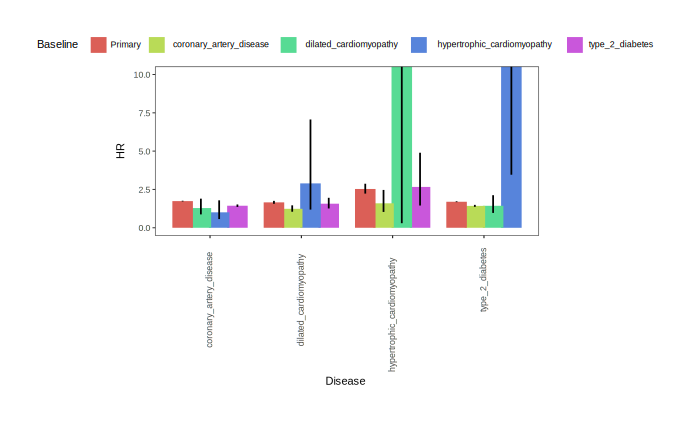

In [163]:
from plotnine import * 
(
    ggplot(
        to_comapre_df,
        aes(x="Disease", y="HR", fill="Baseline")
    )
    + geom_bar(stat="identity", position=position_dodge(width=0.8))
    # + geom_point(
    #     data = plt_data_2,
    #     alpha=.3, size=2, position=position_dodge(width=0.8), na_rm=True)
    + geom_linerange(
        data = to_comapre_df,
        mapping=aes(ymin="HR_LCI", ymax="HR_UCI"),
        size=1,
        alpha=1,
        position=position_dodge(width=0.8),
        na_rm=True,
    )

  + theme(

        #  text=element_text(family="Calibri"),
        figure_size=(6, 5),
        legend_position="top",
        # legend_box="horizontal",
        # legend_direction="horizontal",
        # panel_spacing=0,
        axis_text_x=element_text(angle=90),
        strip_text_x=element_text(size=14, angle=90, lineheight=1),
        strip_background=element_rect(color="black", size=0.5, ),
        panel_background=element_rect(fill="white", color="none",size=0.5),  # 白色背景,
        
        panel_grid=element_blank(),  # 移除网格线
        panel_border=element_rect(color="black", fill="none", size=0.5),
        panel_spacing_x=0.002,
        legend_text=element_text(),  # 调整图例文字大小
        # strip_text=element_text(size=14),  # 调整分面标签的大小和样式
        # plot_title=element_text(size=16, hjust=0.5),  # 添加图表标题并居中
        # # plot_margin = margin(10, 10, 10, 10)  # 设置图表边距
    )
    + coord_cartesian(ylim=(0, 10))
    # + guides(color=guide_legend(nrow=1, title=""))
    # + scale_color_manual(
    #     values=ModelClass_color_dict,
    # )
)

<Axes: xlabel='Disease', ylabel='HR'>

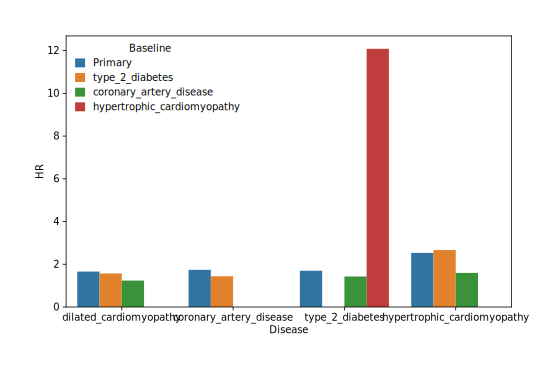

In [143]:
import seaborn as sns 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(
    to_comapre_df.query("n_case >=10 and pvalue < 0.05"),
    x = 'Disease',
    hue = 'Baseline',
    y = 'HR',
    ax=ax
)